In [1]:
%load_ext lab_black

In [2]:
import math
import os
import random
import shutil
from collections import defaultdict
from datetime import datetime
from io import TextIOWrapper
from pathlib import Path
from typing import Callable, List, Sequence, Tuple

import albumentations as A
import cv2
import imageio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from albumentations.pytorch import ToTensorV2
from sklearn.model_selection import KFold
from torch import nn, optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Dataset
from torch.utils.tensorboard import SummaryWriter
from torchvision.models import mobilenet_v2
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from tqdm import tqdm

In [3]:
box_model = fasterrcnn_resnet50_fpn(pretrained=True, progress=False)

In [4]:
box_model.cuda()
box_model.eval()
torch.set_grad_enabled(False)

In [86]:
img = imageio.imread("data/ori/train_imgs/001-1-1-01-Z17_A-0000001.jpg")
x = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0) / 255.0

In [87]:
out = box_model(x.cuda())

In [88]:
pos = out[0]["boxes"][0].cpu().numpy().astype(np.int64)

In [89]:
pos

array([ 944,  289, 1136,  865])

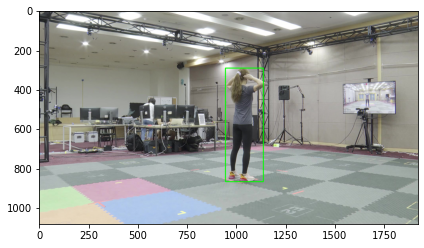

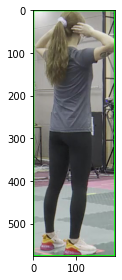

In [90]:
img = cv2.rectangle(img, (pos[0], pos[1]), (pos[2], pos[3]), (0, 255, 0), 3)
plt.imshow(img)
plt.tight_layout()
plt.show()
plt.imshow(img[pos[1] : pos[3], pos[0] : pos[2]])
plt.tight_layout()
plt.show()

In [14]:
df = pd.read_csv("data/ori/train_df.csv")

In [91]:
keypoints = df.iloc[0, 1:].values.astype(np.float32).reshape(-1, 2)

In [92]:
def get_box_from_keypoints(keypoints):
    k = keypoints.astype(np.int64)
    return (k[:, 0].min(), k[:, 1].min(), k[:, 0].max(), k[:, 1].max())

In [93]:
pos = get_box_from_keypoints(keypoints)

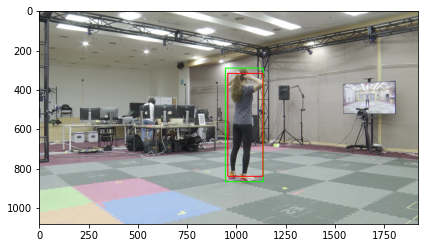

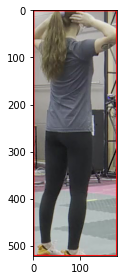

In [94]:
img = cv2.rectangle(img, (pos[0], pos[1]), (pos[2], pos[3]), (255, 0, 0), 3)
plt.imshow(img)
plt.tight_layout()
plt.show()
plt.imshow(img[pos[1] : pos[3], pos[0] : pos[2]])
plt.tight_layout()
plt.show()